Part 1

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob
import scipy.integrate
#importing all the necessary libraries from python, as seen exactly from the sample code, with one addition--
#scipy.integrate. we use this for our trapezoidal integration scheme later on.

In [9]:
#as always, our first task is to import all the data. as opposed to previous labs, this filepath leads to a folder 
#on the desktop instead of referencing from the same directory as this jupyter notebook file. the file contains some
#unnecessary data, so we narrow it down by asking for certain files in particular.
imazdata = '/Users/natenick/Desktop/lab7data/sun_azimuth/'
azfiles = glob.glob(imazdata + "sun*")
azfiles.sort()
imeldata = '/Users/natenick/Desktop/lab7data/sun_elevation/'
elfiles = glob.glob(imeldata + "sun*")
elfiles.sort()

for file in azfiles:
    print(file)
#above, we print out the sorted fils from the azfiles location. we do this so we can call and plot the graphs in 
#order, which will make the fit line look correct towards the end of this code. the fit line traces out each point
#in order, and if they aren't in order, the line will cross back and forth and we can't discern a meaninful shape
#very easily. we will make a list called 'order' to make sure this happens correctly.

/Users/natenick/Desktop/lab7data/sun_azimuth/sun-1_0.dat
/Users/natenick/Desktop/lab7data/sun_azimuth/sun-2_0.dat
/Users/natenick/Desktop/lab7data/sun_azimuth/sun-3_0.dat
/Users/natenick/Desktop/lab7data/sun_azimuth/sun-4_0.dat
/Users/natenick/Desktop/lab7data/sun_azimuth/sun-5_0.dat
/Users/natenick/Desktop/lab7data/sun_azimuth/sun-6_0.dat
/Users/natenick/Desktop/lab7data/sun_azimuth/sun-7_0.dat
/Users/natenick/Desktop/lab7data/sun_azimuth/sun-8_0.dat
/Users/natenick/Desktop/lab7data/sun_azimuth/sun-9_0.dat
/Users/natenick/Desktop/lab7data/sun_azimuth/sun0_0.dat
/Users/natenick/Desktop/lab7data/sun_azimuth/sun10_0.dat
/Users/natenick/Desktop/lab7data/sun_azimuth/sun1_0.dat
/Users/natenick/Desktop/lab7data/sun_azimuth/sun2_0.dat
/Users/natenick/Desktop/lab7data/sun_azimuth/sun3_0.dat
/Users/natenick/Desktop/lab7data/sun_azimuth/sun4_0.dat
/Users/natenick/Desktop/lab7data/sun_azimuth/sun5_0.dat
/Users/natenick/Desktop/lab7data/sun_azimuth/sun6_0.dat
/Users/natenick/Desktop/lab7data/sun_a

In [10]:
#the first step here is to make an empty array we can append our data into. the endgame here is to have an array that
#has between 15 and 21 columns (azimuth and elevation data, respectively) but 1024 rows. we'll go in order and see 
#the exact procedure of how we accomplished this.
az_spectra = []
for azfile in azfiles:
    with open(azfile) as azdata:
        spectrum_rows = []
#we open the files and open them while also naming them 'azdata'. now we also define an array called spectrum_rows
#to bring all this data into.
        for j, row in enumerate(azdata, start=1):
            if j%4 == 0:
                spectrum_rows.append(row)
#'enumerate' is a fancy version of ordering the rows in azdata. only every four lines or so has data we want, so we
#tell python that if the remainder of a row is zero, then it contains data (not random text lines that fill up the
#rest of the array) and we want to add it to our spectrum_rows. this is how we weed out everything else and come up
#with the data we need to continue.
        tot_spectrum = np.zeros(1024)
        for row in spectrum_rows:
            temp_spec = row.split(' ')
#now, we make a tot_spectrum and fill it up with zeros. this is us preparing an array with 1024 rows to append our 
#data into. the data we added to spectrum_rows is not perfect, however-- we have the rows we need, but to python,
#there are still spaces in-between each data point, and it doesn't really know what to do until we figure out how to 
#split them. luckily, there's a 'split' function-- we call 'split' and give it the marker in which to split the rows
#up. here, our marker is a blank space. now we have more condensed data, but it still has blank spaces and white
#spaces. we'll see how to deal with them next.
            spec = []
            for val in temp_spec:
                if val != '' and val != '\n':
                    spec.append(val)
#we make yet another array named 'spec', but the name isn't important, we're just running out of array names. we take
#each value in our temp_spec earlier and tell it that if one of the values within it is not a blank (val != '') or a 
#whitespace (val != '\n'), then it's a data value and we want to append each of these to our spec array. whitespaces
#are python's way of making new rows, so at the end of a row, a '\n' will be attached to denote the end of a row. once
#we weed both of these our, spec array should be populated by just numbers, and that's exactly what we want.
            tot_spectrum = tot_spectrum + np.float64(spec)
        az_spectra.append(tot_spectrum)
#to finish off this process, we define a tot_spectrum and append it with our data points. first, though, we need to 
#make the spec values at every point into floating-point numbers so they aren't integers, and python can work with 
#them easier, and we can be more precise in our summation. originally, tot_spectrum is just a bunch of zeroes, so we
#append with our actual stripped data. and, for a naming convention, we append our original az_spectra with this full
#tot_spectrum, and we now have an array with the dimensions we need. cutting any corners of the process above will
#most likely mess with the dimensions of the array, and without the right sizes, we can't plot the data, and it's
#essentially worthless. the same process is seen below-- the only difference is that we're doing it with our
#elevation data and not our azimuth data. 
el_spectra = []
for elfile in elfiles:
    with open(elfile) as eldata:
        spectrum_rows1 = []
        for j, row in enumerate(eldata, start=1):
            if j%4 == 0:
                spectrum_rows1.append(row)
        tot_spectrum1 = np.zeros(1024)
        for row in spectrum_rows1:
            temp_spec1 = row.split(' ')
            spec1 = []
            for val in temp_spec1:
                if val != '' and val != '\n':
                    spec1.append(val)
            tot_spectrum1 = tot_spectrum1 + np.float64(spec1)
        el_spectra.append(tot_spectrum1)
np.shape(az_spectra)
print(len(az_spectra))
print(len(el_spectra))
#at the end, we print the lengths of our data just to be sure they come out as they should. and, as we see below, 
#they both have the right dimensions, so we're ready to move on to the next step. 

20
15


Text(0, 0.5, 'Flux')

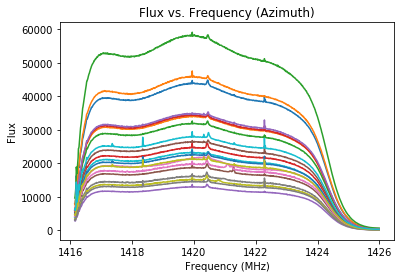

In [11]:
frequency = np.arange(1416, 1426, 0.009766)
#this is defining the range of our x-axis. the range itself consists of the first two numbers, which are both in units
#of MHz. the third number is the step size. we know that the array is between 1416 and 1426 MHz, but since there are
#1024 rows in this range, we take 10/1024 = 0.009766 as the step size. it's the same for both spectra, so we only 
#need to define it once.
for i in range(len(az_spectra)):
    az_spectra_ = az_spectra[i][15:]
    plt.plot(frequency[15:], az_spectra_)
#above, we make the for loop to cycle through and graph each column of data. we use the range(len(az_spectra)) as a 
#clever way to avoid finding the actual dimensions of the array, and even though we already know it, it takes away an
#opportunity for error. there is a spike at the 15th iteration of the frequency axis, so to preserve the integrity of
#our statistical analysis later on, we cut that part out of our graph. losing 15 or so rows out of 1024 possible isn't
#a huge concern for us. below is just naming the axes of our plot. 
plt.show
plt.title('Flux vs. Frequency (Azimuth)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux')

Text(0, 0.5, 'Flux')

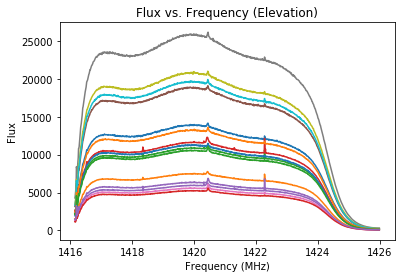

In [12]:
for i in range(len(el_spectra)):
    el_spectra_ = el_spectra[i][15:]
    plt.plot(frequency[15:], el_spectra_)
#we tested and found that the spike occurs at the same spot in both data sets (as we'd expect), so we can use the same
#values for the x-axis. there are 5 less columns of data for the elevation files, so there are less total lines than
#in the previous plot, but the shape of both plots are the same. this tells us that whether we pan side-to-side or 
#up-and-down, the distribution of flux on the sun is pretty consistent. this will be discussed a little more later on.
plt.show
plt.title('Flux vs. Frequency (Elevation)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux')

[316608.62528451 245275.98296013 229960.42673562 179014.08252243
  94248.54038096 135992.55723943 143886.91774908 117216.1251488
 110208.36067042 166830.12288448 163991.30942025 330112.4464528
 418662.27065801 247475.97022446 251561.15270952 190856.71245715
 153222.40024118 105629.64345799 154549.27595686 203141.46070645]


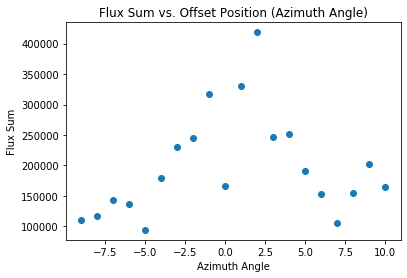

In [13]:
sumaz = np.trapz(az_spectra, frequency)
#we utilize a trapezoidal integration scheme to determine the total flux based on the offset angle. for this graph, 
#we consider the offset of the azimuth angle. this will give us a total flux value based on the value of this offset. 
order = [-1,-2,-3,-4,-5,-6,-7,-8,-9,0,10,1,2,3,4,5,6,7,8,9]
#earlier, we sorted our files to make this part easier. we create a list based on the first number after 'sun' in the
#azimuth data. we plot the sum of each position and plot it against this list called 'order'. it doesn't do a whole
#lot at the moment, but it will later. 10 comes before 1 if you ask python to sort it, so we roll with this 
#convention and move on. a scatter plot is the best way to visualize this data, as it's not a continuous function, but
#a list of (x,y) coordinates.
plt.scatter(order, sumaz)
plt.title('Flux Sum vs. Offset Position (Azimuth Angle)')
plt.xlabel('Azimuth Angle')
plt.ylabel('Flux Sum')
print(sumaz)
#to make sure that we did the sum right, we print out the sum values below. we see that it has the right length and 
#shape as before, which is what we hope for. the individual values don't mean a lot here, but when plotted below, we
#see the shadow of a gaussian distribution, which we will exploit later. 

Text(0, 0.5, 'Flux Sum')

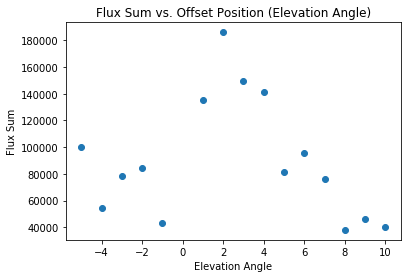

In [14]:
sumel = np.trapz(el_spectra, frequency)
order2 = [-5,-4,-3,-2,-1,1,10,2,3,4,5,6,7,8,9]
plt.scatter(order2, sumel)
plt.title('Flux Sum vs. Offset Position (Elevation Angle)')
plt.xlabel('Elevation Angle')
plt.ylabel('Flux Sum')
#this is pretty much the same as the block above. this time, we use the elevation data, and there are fewer points to 
#be seen, so it looks more barren than before, but the data is slightly better, i.e. there are less unexpected points
#as the plot above. the point in question above is at an azimuth angle of 0.0 and is substantially lower than we'd
#expect, but no data set is perfect. 

the coefficients used by the fit equation (sigma, mu, normalization factor) are: [6.41757996e+00 1.24768351e+00 4.47038146e+06]
the full width half maximum value for this curve fit is: 15.112245930396918


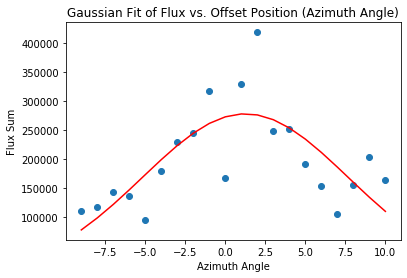

In [15]:
(a0,b0,c0) = (6,1,4000000)
#t1 = 1/((a*(2*3.14)**0.5))
#t2 = -((x-b)**2)/((2*a**2))
def func (x,a,b,c):
    return c*(1/(a*((2*3.14)**0.5)))*np.exp(-((x-b)**2)/(2*a**2))
#we return to our old friend, the curve_fit function. above, we define our function that we want to fit the data to,
#which in this case, is a gaussian distribution. if you look up the equation for a gaussian distribution, you can see
#that it's the same above. sigma, mu, and our normalization factor are given as a, b, and c. at the very top is where
#we give our guesses for the values. it's not important that they're spot-on, but they need to be in the right ball 
#part, or python will invent a new answer that's not what we want (nor is it very accurate). we define our coeffs
#below, and we will ask for them so we can calculate full width half max.
coeffs, fiterr = curve_fit(func, order, sumaz, p0=(a0,b0,c0))
plt.scatter(order, sumaz)
plt.plot(np.sort(order),func(np.sort(order),*coeffs),'r')
plt.show
#above, we again plot the order of our data vs. the summation of the fluxes at different azimuth angle offsets. this
#fit line is what would be screwed up if we didn't order the points correctly. seeing that the line is both straight
#and representative of a gaussian, we can assume they're ordered correctly. we have to define 'a' by itself so we can 
#use it in the full width half maximum calculation, and to do that, we print out the coefficients. 
print('the coefficients used by the fit equation (sigma, mu, normalization factor) are:',coeffs)
plt.title('Gaussian Fit of Flux vs. Offset Position (Azimuth Angle)')
plt.xlabel('Azimuth Angle')
plt.ylabel('Flux Sum')
a = 6.41757996e+00
#this is the full width at half maximum calculation. the only value it depends on is a, and since we defined it above
#we can call it. the equation is very simple and pulled directly from wikipedia, and the only value here that it 
#depends on is the standard deviation, which in our coefficients, is a. this value gives us the width of the graph if
#we trace a line connecting the two values around offset = 0 at which the graph is half of its maximum value. 
fwhm = 2*((2*np.log(2))**(0.5))*a
print('the full width half maximum value for this curve fit is:', fwhm)

the coefficients used by the fit equation (sigma, mu, normalization factor) are: [4.52421506e+00 2.03873220e+00 1.58067847e+06]
the full width half maximum for this gaussian fit is: 10.6537123113189


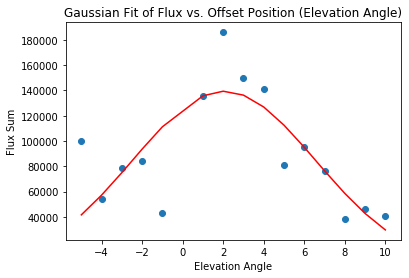

In [16]:
(a0,b0,c0) = (6,1,4000000)
#t1 = 1/((a*(2*3.14)**0.5))
#t2 = -((x-b)**2)/((2*a**2))
def func (x,a,b,c):
    return c*(1/(a*((2*3.14)**0.5)))*np.exp(-((x-b)**2)/(2*a**2))
#this is the same process as the previous block, but used with elevation data instead. the reason the flux drops off
#away from the peak point at about offset angle = 0 is due to a phenomenon called 'limb darkening'. it is discussed
#more in the write-up, but the short version is that as you look at the sun off-center, the optical depth increases,
#and you don't 'see' as deep into the photosphere of the sun (where the photons escape and reach us here on Earth),
#and this results in a drop in flux. 
coeffs, fiterr = curve_fit(func, order2, sumel, p0=(a0,b0,c0))
plt.scatter(order2, sumel)
plt.plot(np.sort(order2),func(np.sort(order2),*coeffs),'r')
plt.show
print('the coefficients used by the fit equation (sigma, mu, normalization factor) are:',coeffs)
plt.title('Gaussian Fit of Flux vs. Offset Position (Elevation Angle)')
plt.xlabel('Elevation Angle')
plt.ylabel('Flux Sum')
#full width half maximum calculation again. the sigma is different here, so we redefine a. we don't need to rename it
#to a different a (since it will define every time the code block is run), but we do, just to be safe. by both seeing
#and calculating, we see that the full width half max value is smaller. this implies a tighter curve, but for our 
#purposes here, it's not exceedingly important to go into. we also don't really concern ourselves with the mu or the
#normalization factor here, as we only care about sigma. 
a2 = 4.52421506e+00
fwhm2 = 2*((2*np.log(2))**(0.5))*a2
print('the full width half maximum for this gaussian fit is:',fwhm2)

In [ ]:
#now that we have plotted each column of data for our two data sets, summed them up as a function of offset angle
#relative to the sun's center, and fitted a gaussian curve to them, we then calculate the full width half max of the
#two fits. we discuss the procedure of each step of this process, and the implications and meanings will be discussed
#more in the write-up. a gaussian fit is a good estimation of the spread of the data points, but there is still noise
#and uncertainty associated with the data. we now conclude the coding section of this report.